# Correlations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats

## Load indicators data

In [2]:
data = pd.read_csv("../data/data_ext_indicators.csv", index_col=0)
data.head()

LGA_Map        Ward_Map                     Population Group  Child_Dep  \
1  Askira/Uba  Hausari Zadawa  Internally Displaced Persons (IDPs)   0.333333   
2  Askira/Uba  Hausari Zadawa  Internally Displaced Persons (IDPs)   0.000000   
3  Askira/Uba  Hausari Zadawa  Internally Displaced Persons (IDPs)   0.500000   
4  Askira/Uba  Hausari Zadawa  Internally Displaced Persons (IDPs)   0.000000   
5  Askira/Uba  Hausari Zadawa                        Non-displaced   0.000000   

   Aged_Dep                             _uuid  WASH_No_Water_Access  \
1       0.0  b6c80fdbb1ca429a9efd6b9e3fa64992                   2.0   
2       0.0  5b7de9fd694d48729a7e09f176608203                   0.0   
3       0.0  7031b6349a9248d1ad8035977126e508                   0.0   
4       0.0  56f7aa22c0ac49a1ae3e65d735d8f78e                   0.0   
5       0.0  fceb0bef99204d818cfebeafa14077ca                   0.0   

   WASH_Below_15lpd  WASH_No_Latrine_Access  WASH_Above_30min     ...      \
1               0.0                     0.0               2.0     ...       
2               0.0                     0.0               0.0     ...       
3               0.0                     0.0               0.0     ...       
4               0.0                     0.0               0.0     ...       
5               0.0                     0.0               0.0     ...       

   SECURITY INCIDENT TYPE         DOCUMENTATION TYPE  \
1                     NaN  Voter identification card   
2                     NaN  Voter identification card   
3                     NaN  Voter identification card   
4                     NaN  Voter identification card   
5                     NaN  Voter identification card   

   DOCUMENTATION CHALLENGES  DETAIN MISSING  AID SOURCE  AID TYPE  \
1             No challenges             NaN         NaN       NaN   
2             No challenges             NaN         NaN       NaN   
3             No challenges             NaN         NaN       NaN   
4             No challenges             NaN         NaN       NaN   
5             No challenges             NaN         NaN       NaN   

   NOT SATISFIED WITH AID RECEIVED  NOT SATISFIED WITH AID WORKER TREATMENT  \
1                              NaN                                      NaN   
2                              NaN                                      NaN   
3                              NaN                                      NaN   
4                              NaN                                      NaN   
5                              NaN                                      NaN   

   EXCLUDED FROM AID     Cluster  
1                NaN   2 (FL 27)  
2                NaN   2 (FL 27)  
3                NaN  4 (FLH 21)  
4                NaN   2 (FL 27)  
5                NaN   2 (FL 27)  

[5 rows x 83 columns]

### Pick subset of columns to explore

In [3]:
column_map = { "WEIGHT_WASH": "WASH", "WEIGHT_SHELTER": "SHELTER", "WEIGHT_HEALTH": "HEALTH" }
cat4color  = "Population Group"
cat_order  = [ "Non-displaced", "Internally Displaced Persons (IDPs)", "Returnees" ]

cat_series = data[cat4color].astype("category").cat.reorder_categories(cat_order)
data_corr  = pd.concat([data[["WEIGHT_WASH", "WEIGHT_SHELTER", "WEIGHT_HEALTH"]], cat_series], axis=1)
data_corr.rename(columns=column_map, inplace=True)
data_corr.head()

WASH  SHELTER  HEALTH                     Population Group
1   4.0      1.0     0.0  Internally Displaced Persons (IDPs)
2   0.0      3.0     0.0  Internally Displaced Persons (IDPs)
3   0.0      3.0     0.0  Internally Displaced Persons (IDPs)
4   0.0      3.0     0.0  Internally Displaced Persons (IDPs)
5   0.0      1.0     0.0                        Non-displaced

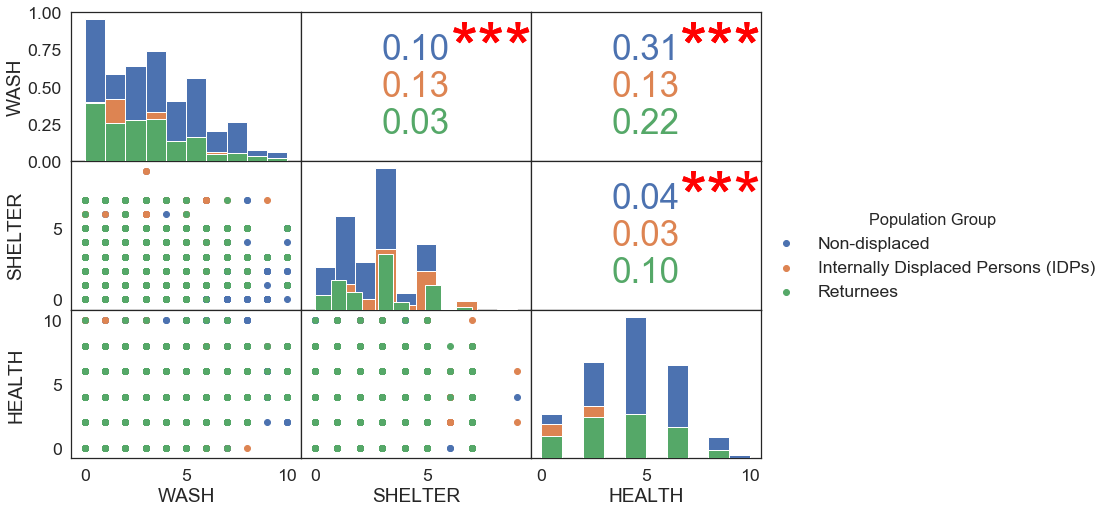

In [4]:
def corr_values(x, y, **kwargs):
    corr_text = f'%.2f' % x.corr(y, 'pearson')
    if ("label" in kwargs) & ("levels" in kwargs):
        idx_level = kwargs["levels"].index(kwargs["label"])
        y_coord = 0.75 - 0.25 * idx_level
    else:
        y_coord = 0.5

    ax = plt.gca()
    ax.annotate(corr_text, [.5, y_coord,], xycoords="axes fraction",
                ha='center', va='center', fontsize=35, color=kwargs["color"])


def corr_significance(x, y, **kws):
    r, p = stats.pearsonr(x, y)
    p_stars = ''
    if p <= 0.05:
        p_stars = '*'
    if p <= 0.01:
        p_stars = '**'
    if p <= 0.001:
        p_stars = '***'
    ax = plt.gca()
    ax.annotate(p_stars, xy=(0.65, 0.6), xycoords=ax.transAxes,
                color='red', fontsize=70)

def plot_corrmatrix(df, hue_column, hue_column_order):
    sns.set(style='white', font_scale=1.6)
    g = sns.PairGrid(df, aspect=1.5, diag_sharey=False, despine=False, hue=hue_column)

    g = g.map_diag(plt.hist)
    g = g.map_lower(plt.scatter)
    g = g.map_upper(corr_values, levels=hue_column_order)
    g = g.map_upper(corr_significance)
    g = g.add_legend()

    g.fig.subplots_adjust(wspace=0, hspace=0)
    for ax in g.axes[:,0]:
        ax.get_yaxis().set_label_coords(-0.2,0.5)

plot_corrmatrix(data_corr, cat4color, cat_order)

# Example of Needs Distribution for Different Types of Households

/Users/natallie/anaconda3/envs/hack4good/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


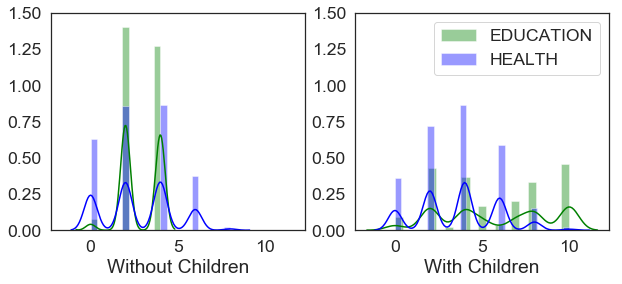

In [5]:
data_clean = pd.read_pickle("../data/data_clean.pkl")
idx = data_clean['Total Household Members 0-18 years old'] > 0

dist_sample = pd.DataFrame({ "EDUCATION": data["WEIGHT_EDU"],
                             "HEALTH":    data["WEIGHT_HEALTH"] }, index=data.index)

f, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)

sns.distplot(dist_sample["EDUCATION"][~idx], color="green", label="EDUCATION", ax=axes[0])
sns.distplot(dist_sample["HEALTH"][~idx],    color="blue",  label="HEALTH",    ax=axes[0])
sns.distplot(dist_sample["EDUCATION"][idx],  color="green", label="EDUCATION", ax=axes[1])
sns.distplot(dist_sample["HEALTH"][idx],     color="blue",  label="HEALTH",    ax=axes[1])
axes[0].set(xlabel='Without Children', ylim=(0, 1.5))
axes[1].set(xlabel='With Children',    ylim=(0, 1.5))
plt.legend()